In [2]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from PIL import ImageFont, ImageDraw, Image

# 컬러면 BGR을 RGB로 변환, 흑백이면 흑백으로 출력
def imshow(tit, image):
    plt.title(tit)
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap='gray')
    plt.show()

# Tesseract을 이용해 문자 찾기(OCR)

In [3]:
# Tesseract 프로그램, pip install pytesseract 둘 다 설치 후
import pytesseract
#설치 프로그램 경로 설정
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

In [ ]:
image = cv2.imread('ocr-text.png',0)   
#img_blur = cv2.GaussianBlur(image, (3,3), 0)
binary = cv2.adaptiveThreshold(image, 255,
          cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
          cv2.THRESH_BINARY, 21, 5)
imshow("", binary)
cv2.imwrite("out.png", binary)

In [ ]:
# 전처리를 한 사진으로 OCR
str = pytesseract.image_to_string('out.png')
print(str)

In [11]:
# 전처리 없이 OCR
str = pytesseract.image_to_string('ocr-text.png')
print(str)

Having just recently reviewed the ATI Radeo
we were Keen to get our hands on the cheape
Q 5850. Though both cards were announced
week until the Radeon 1-ID 5850 could be she
have finally dug up a production model from


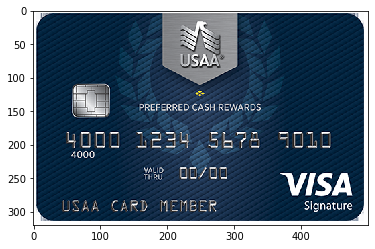

Dota e na AS

OE gms eet

4000

SAID

fie] VISA

USAA CARD MEMBER Senet


In [15]:
str = pytesseract.image_to_string('personal_credit_card.png')
img = cv2.imread('personal_credit_card.png')
imshow('',img)
print(str)

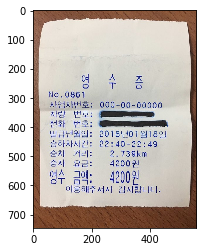

여
ㅇ
10.0861

사업지번로:

그ㅋ  1ㅎㆍ
진량. 먼오:

2:40-22:
2.7390
4200원
420(원

감사합니다.


In [18]:
image = cv2.imread('mart5.jpg') 
str = pytesseract.image_to_string('mart5.jpg', lang='kor')
imshow('',image)
print(str)

# 책 찾기

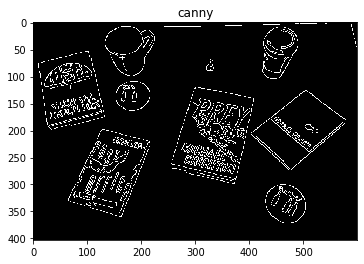

In [41]:
image = cv2.imread("book.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (3, 3), 0)
# Canny : 10이하는 제거, 250 이상의 값은 edge로 간주.
edged = cv2.Canny(gray, 10, 250) 

imshow('canny',edged)

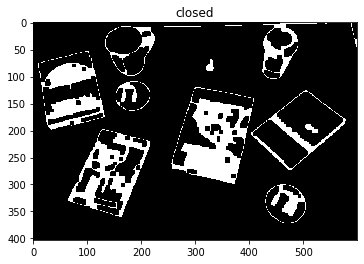

In [42]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7, 7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)

imshow('closed',closed)

I found 4 books in that image


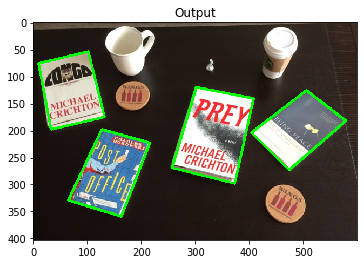

In [43]:
#closed.copy()를 쓰는 이유 : contour를 처리하면서 원본 영상에 영항을 미치기 때문.
cnts, _ = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

# cv2.drawContours(image, cnts, -1, (0, 0, 255), 1)
# cv2.imwrite('asd.png',image)
for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)       #꼭지점 찾기

    if len(approx) == 4:   # 사각형의 책만 찾기위해 4
        cv2.drawContours(image, [approx], -1, (0, 255, 0), 4)
        total += 1
print("I found {0} books in that image".format(total))
imshow("Output", image)

# 원 찾기(바둑돌)

In [62]:
from collections import Counter

def detect_weiqi(img):  
    txt = 'black'
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, threshold = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)
    
    # Counter : 해당 리스트 내의 value 값의 개수를 순차적으로 나타냄. 0이 많은지 255가 많은지 파악
    c = Counter(list(threshold.flatten())) 
    print(c.most_common())
    if c.most_common()[0][0] != 0:
        txt = 'white'
    return txt, threshold

In [63]:
img = cv2.imread('stone.png')

img = cv2.medianBlur(img, 5)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 해상도,  원간 최소 거리      edge threshold       circle 중심점 histogram수,
# 1,        20,             param1=100,  param2=30, minRadius=10, maxRadius=50
# param1 : edge threshold low ->  edge가 검출되어 같은 원이 검출됨
# param2 : 중심점 histogram 수가 작으면 많은 원이 검출됨

# HoughCircles : 사진에서 원을 찾아주는 함수. 
# (영상, edge(고정), 입력과 출력사진의 스케일 조정(1은 원본 크기 그대로), 
# 20:측정 할 원과 원 사이의 최소 거리, 
# param1 : 
# param2 : 

circles = cv2.HoughCircles(gray, cv2.HOUGH_GRADIENT,
                           1, 20, param1=100, param2=30, 
                           minRadius=10, maxRadius=50)

circles = np.uint16(np.around(circles))
# print(circles)

[(255, 2164), (0, 972)]
[(0, 2865), (255, 499)]
[(255, 2166), (0, 970)]
[(255, 2362), (0, 1002)]
[(255, 2255), (0, 1109)]
[(255, 2121), (0, 1015)]
[(255, 2258), (0, 1106)]
[(0, 2869), (255, 267)]
[(0, 2749), (255, 387)]
[(255, 2366), (0, 998)]
[(0, 2893), (255, 243)]
[(0, 3025), (255, 339)]
[(0, 2881), (255, 255)]
[(0, 2914), (255, 222)]
[(255, 1962), (0, 954)]
[(255, 2255), (0, 1109)]
[(0, 2808), (255, 328)]
[(0, 3038), (255, 326)]


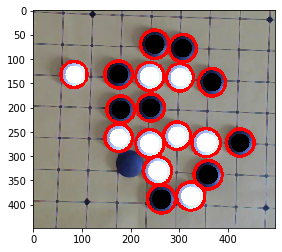

In [64]:
font = cv2.FONT_HERSHEY_SIMPLEX
for i in circles[0, :]:
    x, y, r = i
    cv2.circle(img, (x,y),r, (0, 0, 255), 5)
    crop_img = img[y - r:y + r, x - r:x + r]    
    txt, threshold = detect_weiqi(crop_img)
    
    if txt == 'black' :  
        cv2.circle(img, (i[0], i[1]),int(i[2]*0.7), (0, 0, 0), -1)
    else :
        cv2.circle(img, (i[0], i[1]), int(i[2]*0.7), (255, 255, 255), -1)            


imshow("", img)

# 영상 변환

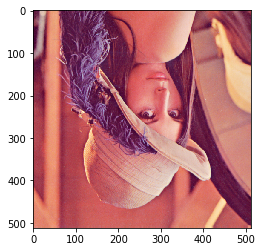

In [69]:
# 반전
img_lena = cv2.imread('lena.png')
img_flip = cv2.flip(img_lena, 0) # 0 : 상하반전, 1 : 좌우반전
imshow('', img_flip)

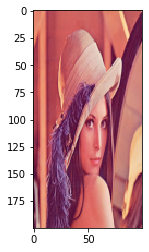

(512, 512, 3) (200, 100, 3)


In [79]:
# 크기 변환 1. 절대적 수치로 조절
img_lena = cv2.imread('lena.png')
img_resize = cv2.resize(img_lena, (100,200), interpolation = cv2.INTER_AREA) 
imshow('', img_resize)
print(img_lena.shape, img_resize.shape)

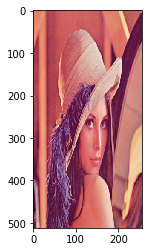

(512, 512, 3) (512, 256, 3)


In [103]:
# 크기 변환 2. 비율로 조절
img_lena = cv2.imread('lena.png')
img_resize = cv2.resize(img_lena, None, fx=0.5, fy=1.0, interpolation = cv2.INTER_AREA)
imshow('', img_resize)
print(img_lena.shape, img_resize.shape)

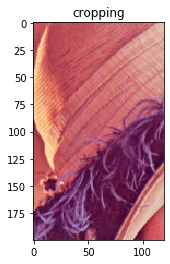

In [104]:
# 부분 자르기
img_lena = cv2.imread('lena.png')
cropping = img_lena[100:300, 120:240]
imshow('cropping', cropping)

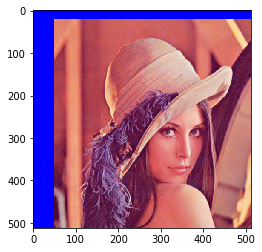

In [205]:
# 이동
img_lena = cv2.imread('lena.png')
height, width = img_lena.shape[:2]
M = np.float32([[1, 0, 50],[0, 1, 20]])
# dst = cv2.warpAffine(img_lena, M, (width,height), borderValue=(255,0,0))
dst=cv2.warpAffine(img_lena,M,(width,height),borderValue=(255,0,0))

imshow('', dst)

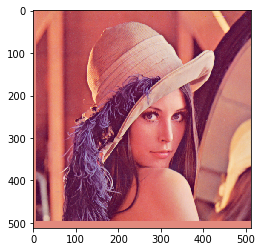

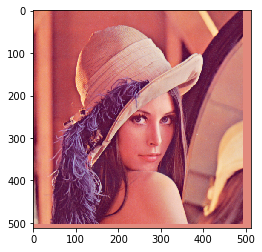

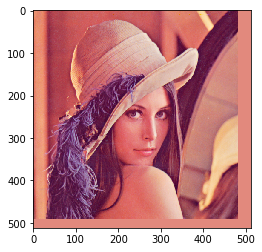

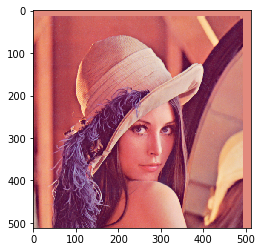

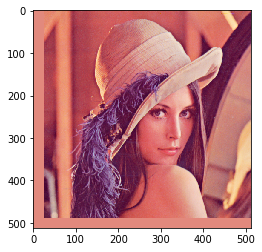

In [222]:
# 이동2
import random

img_lena = cv2.imread('lena.png')
height, width = img_lena.shape[:2]
c = img_lena[0,0]

for _ in range(5) :
    ran1 = random.randint(-30,30)
    ran2 = random.randint(-30,30)
    M = np.float32([[1, 0, ran1],[0, 1, ran2]])
    dst=cv2.warpAffine(img_lena,M,(width,height),borderValue=((int(c[0]),int(c[1]),int(c[2]))))
    imshow('', dst)

[[  0.4330127    0.25        81.14874832]
 [ -0.25         0.4330127  209.14874832]]
(512, 512, 3)


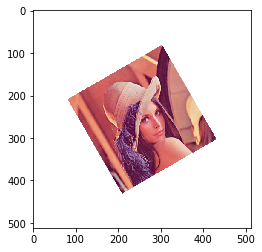

In [232]:
# 회전
img_lena = cv2.imread('lena.png')
height, width = img_lena.shape[:2]
img_center = (width/2, height/2)
M = cv2.getRotationMatrix2D(img_center, 30, 0.5)
print(M)

rotated_image = cv2.warpAffine(img_lena, M, (width,height), borderValue=(255,255,255))
print(rotated_image.shape)
imshow('', rotated_image)

[[ 27. 179.]
 [611.  36.]
 [118. 534.]
 [754. 325.]]
[[  0.   0.]
 [811.   0.]
 [  0. 577.]
 [811. 577.]]
[[ 1.22316837e+00 -3.13544568e-01  2.30989317e+01]
 [ 4.53502840e-01  1.85206754e+00 -3.43764667e+02]
 [-1.29571760e-04  4.23781663e-04  1.00000000e+00]]


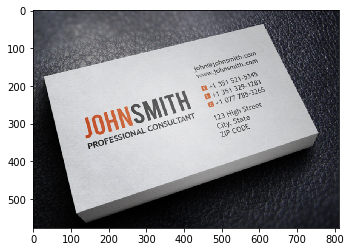

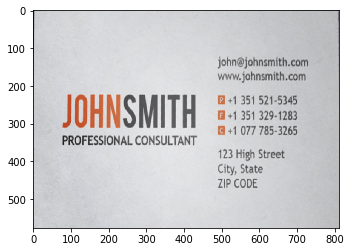

In [240]:
# 좌표를 이용해 이동 및 회전
img = cv2.imread('namecard.png')
height, width = img.shape[:2]

point_list = [[27, 179], [611,36], [118,534], [754,325]]

pts1 = np.float32([list(point_list[0]),
                   list(point_list[1]),
                   list(point_list[2]),
                   list(point_list[3])])
print(pts1)
pts2 = np.float32([[0,0], [width,0], [0,height], [width,height]])
print(pts2)

M = cv2.getPerspectiveTransform(pts1, pts2)

print(M)

img_result = cv2.warpPerspective(img, M, (width, height))

imshow('', img)
imshow('', img_result)

1


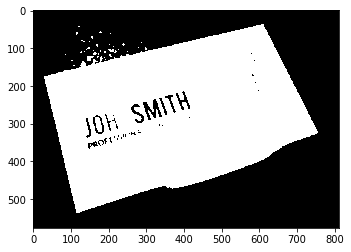

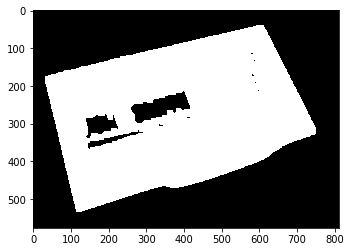

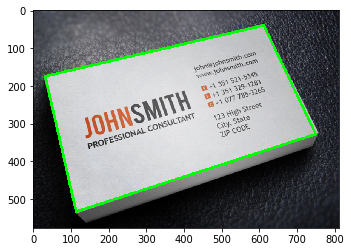

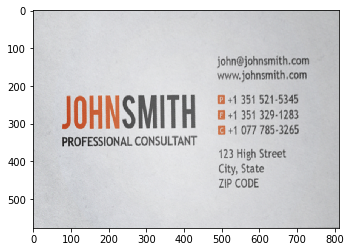

JOHNSMITH

PROFESSIONAL CONSULTANT

john@johnsmith.com
www.johnsmith.com

+4 354 521-5345
fi +1 351 329-1283
+1 077 785-3265

123 High Street
City, State
ZIP CODE


In [340]:
import math
img = cv2.imread('namecard.png')
img_copy = img.copy()
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(gray, (9,9), 0)
_, binary = cv2.threshold(img_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3), np.uint8)

opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=7)

contours, _ = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) #RETR_EXTERNAL:외곽만

print(len(contours))

length = cv2.arcLength(contours[0], True)  #도형 윤곽 길이, 폐곡선 여부 True
approx = cv2.approxPolyDP(contours[0], 0.02 * length, True) #얼마나 꺾이는지 확인, 꼭지점 위치
cv2.drawContours(img_copy, [approx], -1, (0,255,0),5)

# imshow('', img_blur)
imshow('', binary)
imshow('', opening)
imshow('', img_copy)

height, width = img.shape[:2]
point_list = approx
pts1 = np.float32([list(point_list[1]),
                   list(point_list[0]),
                   list(point_list[2]),
                   list(point_list[3])])

# print(pts1)
pts2 = np.float32([[0,0], [width,0], [0,height], [width,height]])
# print(pts2)
M = cv2.getPerspectiveTransform(pts1, pts2)
# print(M)
img_result = cv2.warpPerspective(img, M, (width, height))
imshow('', img_result)
str = pytesseract.image_to_string(img_result)
print(str)